In [2]:
#data collections from 
import pandas_datareader as pdr
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler

key = 'ea8ef734d6d2de9fd298aecb8d3bfa1fc45b97dd' #key is my personal 

## Explore The Data: What Data Are We Using?

Using the stock api from  dataset from [this] (https://www.tiingo.com/).

Tiingo's APIs are built to be performant, consistent, and also support extensive filters to speed up your development time.

Because of this, we hope you will take the time to read the documentation and learn about all of our features, but we also understand you may want to jump right in. So if you want to jump right in, click on any endpoint link, which are located on the sidebar to your left.

In order to use the API, you must sign-up to create an account. All accounts are free and if you need higher usage limits, or you have a commercial use case, you can upgade to the Power and/or Commercial plan.

Once you create an account, your account with be assigned an authentication token. This token is used in place of your username & password throughout the API, so keep it safe like you would your password.

You can find your API token by clicking [here ](https://api.tiingo.com/account/api/token), or to make it easy, your token will be shown below if you are logged in.


- **Date**       (date) -   The date this data pertains to.
- **Open**       (float) -  The opening price for the asset on the given date
- **High**       (float) -  The high price for the asset on the given date.
- **Low**        (float) -  The low price for the asset on the given date.
- **Close**      (float) -  The closing price of the given asset on the given date.
- **volume**     (int64) -  The number of shares traded for the asset
- **adj Open**   (float) -  The adjusted opening price for the asset on the given date
- **Adj High**   (float) -  The adjusted High price for the asset on the given date
- **Adj Low**    (flaot) -  The adjusted Low price for the asset on the given date
- **Adj Closed** (float) -  The adjusted Closing price for the asset on the given date
- **Adj Volume** (int64) -  The number of sahres traded for the asset
- **Dividend**   (float) -  The dividend paid out on"date"(note that "date" will be the "exDate" fpr the dividend).
- **Split**      (float)  - The factor used to adjust prices when company split, reverse splits, or pays a distribution.

In [3]:
df_entity = pdr.get_data_tiingo('JPM', api_key=key)

So here is the list of companies with their Symbol for trading  NSE [here](https://www.nseindia.com/) & NSDAQ [here](https://www.nasdaq.com/market-activity/stocks/screener)

In [4]:
df_entity.to_csv('JPmorgan.csv') #load the data into csv file

In [5]:
df = pd.read_csv('JPmorgan.csv') # read the loaded csv file

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [7]:
df.head(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,JPM,2016-08-26 00:00:00+00:00,66.22,66.880,65.845,66.33,14038597,57.722697,58.298007,57.395817,57.818582,14038597,0.0,1.0
1,JPM,2016-08-29 00:00:00+00:00,66.95,67.100,66.460,66.49,14580044,58.359024,58.489777,57.931901,57.958051,14580044,0.0,1.0
2,JPM,2016-08-30 00:00:00+00:00,67.50,67.595,66.950,66.96,13791126,58.838449,58.921258,58.359024,58.367741,13791126,0.0,1.0
3,JPM,2016-08-31 00:00:00+00:00,67.50,67.770,66.855,67.46,14952329,58.838449,59.073803,58.276215,58.803582,14952329,0.0,1.0
4,JPM,2016-09-01 00:00:00+00:00,67.21,67.720,66.650,67.64,12226517,58.585661,59.030219,58.097520,58.960484,12226517,0.0,1.0


In [8]:
df.tail(5)

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,JPM,2021-08-18 00:00:00+00:00,155.58,158.01,155.34,156.31,8065493,155.58,158.01,155.34,156.31,8065493,0.0,1.0
1253,JPM,2021-08-19 00:00:00+00:00,154.28,155.56,153.01,153.16,9517737,154.28,155.56,153.01,153.16,9517737,0.0,1.0
1254,JPM,2021-08-20 00:00:00+00:00,154.72,154.90,153.16,154.35,6974102,154.72,154.90,153.16,154.35,6974102,0.0,1.0
1255,JPM,2021-08-23 00:00:00+00:00,156.70,157.09,155.24,155.33,7934587,156.70,157.09,155.24,155.33,7934587,0.0,1.0
1256,JPM,2021-08-24 00:00:00+00:00,157.67,158.55,156.87,157.00,7670925,157.67,158.55,156.87,157.00,7670925,0.0,1.0


In [9]:
df1 = df.reset_index()['close']  #taking the dependent varailbe out

In [10]:
df1.shape

(1257,)

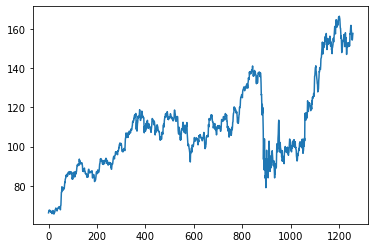

In [11]:
plt.plot(df1)

In [12]:
# LSTM are sensitive to the scale of the data. so we apply MInMax scaler

scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1.shape

(1257, 1)

In [14]:
# splitting dataset into train & test split for dependent variable

training_size=int(len(df1)*0.80)
test_size  = len(df1)-training_size
train_data,test_data = df1[0:training_size,:],df1[training_size:len(df1),:1]
print('Train Shape:', train_data.shape)
print('Test Shape:', test_data.shape)

Train Shape: (1005, 1)
Test Shape: (252, 1)


In [15]:
# convert an array of data into dataset matrix

def create_dataset (dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]            ## i=0 , 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i +time_step,0])
    return np.array(dataX), np.array(dataY)        

In [16]:
#reshape into X=t,t+1 ,t+2,t+3 and Y=t+4
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print('Train Shape:', X_train.shape, y_train.shape )
print('Test Shape:', X_test.shape, y_test.shape)

Train Shape: (904, 100) (904,)
Test Shape: (151, 100) (151,)


In [17]:
# reshpae input into to be [Samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [18]:
print('Train Shape:', X_train.shape)
print('Test Shape:', X_test.shape)

Train Shape: (904, 100, 1)
Test Shape: (151, 100, 1)


In [19]:
## Create the Stacked LSTM model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64,verbose=1)

Epoch 1/100
15/15 [==============================] - 13s 377ms/step - loss: 0.0401 - val_loss: 0.1199
Epoch 2/100
15/15 [==============================] - 3s 219ms/step - loss: 0.0075 - val_loss: 0.0453
Epoch 3/100
15/15 [==============================] - 3s 204ms/step - loss: 0.0045 - val_loss: 0.0222
Epoch 4/100
15/15 [==============================] - 3s 230ms/step - loss: 0.0033 - val_loss: 0.0089
Epoch 5/100
15/15 [==============================] - 4s 234ms/step - loss: 0.0028 - val_loss: 0.0060
Epoch 6/100
15/15 [==============================] - 4s 236ms/step - loss: 0.0027 - val_loss: 0.0045
Epoch 7/100
15/15 [==============================] - 3s 229ms/step - loss: 0.0025 - val_loss: 0.0026
Epoch 8/100
15/15 [==============================] - 3s 225ms/step - loss: 0.0024 - val_loss: 0.0048
Epoch 9/100
15/15 [==============================] - 3s 217ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 10/100
15/15 [==============================] - 3s 218ms/step - loss: 0.0021 - val_l

15/15 [==============================] - 3s 223ms/step - loss: 6.5485e-04 - val_loss: 0.0011
Epoch 80/100
15/15 [==============================] - 3s 224ms/step - loss: 6.5180e-04 - val_loss: 0.0011
Epoch 81/100
15/15 [==============================] - 3s 224ms/step - loss: 6.4558e-04 - val_loss: 0.0011
Epoch 82/100
15/15 [==============================] - 3s 224ms/step - loss: 6.4308e-04 - val_loss: 0.0011
Epoch 83/100
15/15 [==============================] - 3s 224ms/step - loss: 6.6256e-04 - val_loss: 0.0016
Epoch 84/100
15/15 [==============================] - 3s 224ms/step - loss: 6.6222e-04 - val_loss: 0.0014
Epoch 85/100
15/15 [==============================] - 3s 224ms/step - loss: 6.7661e-04 - val_loss: 9.3180e-04
Epoch 86/100
15/15 [==============================] - 3s 224ms/step - loss: 6.6958e-04 - val_loss: 9.5891e-04
Epoch 87/100
15/15 [==============================] - 3s 221ms/step - loss: 7.2287e-04 - val_loss: 0.0013
Epoch 88/100
15/15 [==============================]

In [32]:
# lets Do the prediction and chekc performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
# tranformback to original form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
# Calcualte RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

105.64553244709708

In [27]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

151.37479264897442

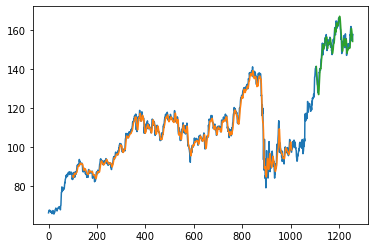

In [28]:
## plotting 
#shift train prediction for plotting
look_back=100
trainPredictPlot =np.empty_like(df1)
trainPredictPlot[:, :] =np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] =train_predict

# shift test predictions forplotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] =np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] =test_predict

#plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [29]:
len(test_data)

252

In [35]:
x_input = test_data[152:].reshape(1, -1)

In [36]:
x_input.shape

(1, 100)

In [37]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [38]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8952971]
101
1 day input [0.86208949 0.88580216 0.88768727 0.89919635 0.89592221 0.877468
 0.84889374 0.85841849 0.86962992 0.86318087 0.8296458  0.84224625
 0.81079472 0.83877369 0.84244469 0.8492906  0.85901379 0.88838178
 0.87468995 0.87022522 0.89125905 0.91149916 0.94295069 0.94840758
 0.94820915 0.92161921 0.91080464 0.9509872  0.97589047 0.98243873
 0.95942058 0.94711777 0.94433972 0.96249628 0.9712273  0.95445977
 0.95426134 0.97926382 0.97817244 0.99613057 0.99622978 0.99732116
 1.         0.99226114 0.98571287 0.96527433 0.94007342 0.93898204
 0.91199524 0.88828257 0.89909713 0.85435063 0.81625161 0.84115488
 0.83897212 0.84800079 0.86179184 0.87707114 0.87984919 0.87796408
 0.89185435 0.90713364 0.89671594 0.8707213  0.87250719 0.8462149
 0.89413632 0.91626153 0.89294573 0.88768727 0.89106062 0.85583887
 0.80682607 0.83401131 0.86526441 0.84611569 0.84323842 0.85325925
 0.85127493 0.85375533 0.86665344 0.85454906 0.84849687 0.86556206
 0.84919139 0.86814168 0.91130072 0.9

9 day output [[0.8771396]]
10 day input [0.86318087 0.8296458  0.84224625 0.81079472 0.83877369 0.84244469
 0.8492906  0.85901379 0.88838178 0.87468995 0.87022522 0.89125905
 0.91149916 0.94295069 0.94840758 0.94820915 0.92161921 0.91080464
 0.9509872  0.97589047 0.98243873 0.95942058 0.94711777 0.94433972
 0.96249628 0.9712273  0.95445977 0.95426134 0.97926382 0.97817244
 0.99613057 0.99622978 0.99732116 1.         0.99226114 0.98571287
 0.96527433 0.94007342 0.93898204 0.91199524 0.88828257 0.89909713
 0.85435063 0.81625161 0.84115488 0.83897212 0.84800079 0.86179184
 0.87707114 0.87984919 0.87796408 0.89185435 0.90713364 0.89671594
 0.8707213  0.87250719 0.8462149  0.89413632 0.91626153 0.89294573
 0.88768727 0.89106062 0.85583887 0.80682607 0.83401131 0.86526441
 0.84611569 0.84323842 0.85325925 0.85127493 0.85375533 0.86665344
 0.85454906 0.84849687 0.86556206 0.84919139 0.86814168 0.91130072
 0.90961405 0.92876277 0.94761385 0.95386447 0.93590634 0.92548864
 0.90643913 0.89225122

17 day output [[0.84325945]]
18 day input [0.88838178 0.87468995 0.87022522 0.89125905 0.91149916 0.94295069
 0.94840758 0.94820915 0.92161921 0.91080464 0.9509872  0.97589047
 0.98243873 0.95942058 0.94711777 0.94433972 0.96249628 0.9712273
 0.95445977 0.95426134 0.97926382 0.97817244 0.99613057 0.99622978
 0.99732116 1.         0.99226114 0.98571287 0.96527433 0.94007342
 0.93898204 0.91199524 0.88828257 0.89909713 0.85435063 0.81625161
 0.84115488 0.83897212 0.84800079 0.86179184 0.87707114 0.87984919
 0.87796408 0.89185435 0.90713364 0.89671594 0.8707213  0.87250719
 0.8462149  0.89413632 0.91626153 0.89294573 0.88768727 0.89106062
 0.85583887 0.80682607 0.83401131 0.86526441 0.84611569 0.84323842
 0.85325925 0.85127493 0.85375533 0.86665344 0.85454906 0.84849687
 0.86556206 0.84919139 0.86814168 0.91130072 0.90961405 0.92876277
 0.94761385 0.95386447 0.93590634 0.92548864 0.90643913 0.89225122
 0.87935311 0.88371862 0.90336343 0.9129874  0.89529711 0.89717138
 0.89560455 0.8932826

 0.80889714 0.80025864 0.79090738 0.7807771 ]
26 day output [[0.7697962]]
27 day input [0.91080464 0.9509872  0.97589047 0.98243873 0.95942058 0.94711777
 0.94433972 0.96249628 0.9712273  0.95445977 0.95426134 0.97926382
 0.97817244 0.99613057 0.99622978 0.99732116 1.         0.99226114
 0.98571287 0.96527433 0.94007342 0.93898204 0.91199524 0.88828257
 0.89909713 0.85435063 0.81625161 0.84115488 0.83897212 0.84800079
 0.86179184 0.87707114 0.87984919 0.87796408 0.89185435 0.90713364
 0.89671594 0.8707213  0.87250719 0.8462149  0.89413632 0.91626153
 0.89294573 0.88768727 0.89106062 0.85583887 0.80682607 0.83401131
 0.86526441 0.84611569 0.84323842 0.85325925 0.85127493 0.85375533
 0.86665344 0.85454906 0.84849687 0.86556206 0.84919139 0.86814168
 0.91130072 0.90961405 0.92876277 0.94761385 0.95386447 0.93590634
 0.92548864 0.90643913 0.89225122 0.87935311 0.88371862 0.90336343
 0.9129874  0.89529711 0.89717138 0.89560455 0.89328265 0.89084476
 0.88835204 0.88576728 0.88305491 0.880187

In [39]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [50]:
df1.shape
#scaler.inverse_transform(df1[1257:])

(1257, 1)

In [53]:
lst_output

[[0.895297110080719],
 [0.8971713781356812],
 [0.8956045508384705],
 [0.8932826519012451],
 [0.8908447623252869],
 [0.8883520364761353],
 [0.8857672810554504],
 [0.8830549120903015],
 [0.8801872730255127],
 [0.8771396279335022],
 [0.873888373374939],
 [0.8704091310501099],
 [0.8666770458221436],
 [0.8626660108566284],
 [0.85834801197052],
 [0.8536949753761292],
 [0.8486763834953308],
 [0.8432594537734985],
 [0.837410569190979],
 [0.8310918807983398],
 [0.8242630958557129],
 [0.8168809413909912],
 [0.8088971376419067],
 [0.8002586364746094],
 [0.7909073829650879],
 [0.780777096748352],
 [0.7697961926460266],
 [0.7578826546669006],
 [0.7449449300765991],
 [0.7308816313743591]]

In [54]:
scaler.inverse_transform(lst_output)

array([[155.88699573],
       [156.0759032 ],
       [155.91798268],
       [155.68395849],
       [155.43824359],
       [155.18700176],
       [154.92648426],
       [154.65310459],
       [154.36407525],
       [154.0569031 ],
       [153.72920915],
       [153.37853632],
       [153.00237945],
       [152.59810723],
       [152.16289613],
       [151.69391657],
       [151.18809269],
       [150.64212035],
       [150.05261127],
       [149.41575067],
       [148.72747743],
       [147.98343008],
       [147.1787425 ],
       [146.30806797],
       [145.36555513],
       [144.34452358],
       [143.23775826],
       [142.03699276],
       [140.7329995 ],
       [139.31555963]])

In [73]:
scaler.inverse_transform(df1[1256:])
#scaler.inverse_transform(df1[1257:,])

array([[157.67]])

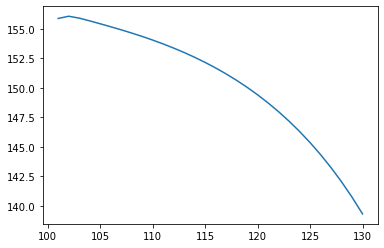

In [76]:
#plt.plot(day_new,df1[1156:])
plt.plot(day_pred,scaler.inverse_transform(lst_output))

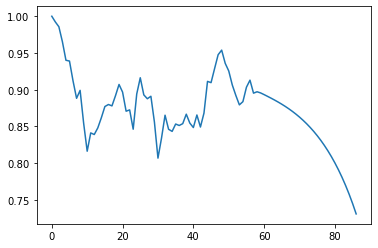

In [55]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [56]:
df3=scaler.inverse_transform(df3).tolist()

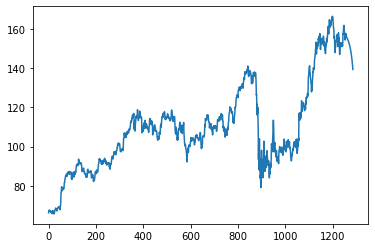

In [57]:
plt.plot(df3)